In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


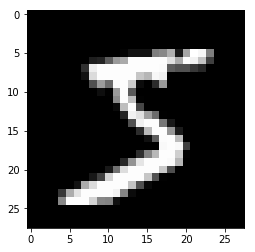

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')

In [17]:
import numpy as np

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [23]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test  /= 255.0

In [44]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [48]:
inp_num = x_train.shape[1]
out_num = y_train_cat.shape[1]
print(inp_num, out_num)

784 10


In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import keras.backend as K


K.clear_session()



model = Sequential()
model.add(Dense(512, input_dim = inp_num, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(out_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [50]:
h = model.fit(x_train, y_train_cat, batch_size=128, epochs=10, verbose=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s - loss: 0.3378 - acc: 0.8957 - val_loss: 0.1708 - val_acc: 0.9507
Epoch 2/10
48000/48000 [==============================] - 3s - loss: 0.1145 - acc: 0.9662 - val_loss: 0.1353 - val_acc: 0.9624
Epoch 3/10
48000/48000 [==============================] - 3s - loss: 0.0773 - acc: 0.9770 - val_loss: 0.0970 - val_acc: 0.9751
Epoch 4/10
48000/48000 [==============================] - 3s - loss: 0.0573 - acc: 0.9831 - val_loss: 0.0999 - val_acc: 0.9753
Epoch 5/10
48000/48000 [==============================] - 3s - loss: 0.0429 - acc: 0.9869 - val_loss: 0.1022 - val_acc: 0.9765
Epoch 6/10
48000/48000 [==============================] - 3s - loss: 0.0348 - acc: 0.9895 - val_loss: 0.0994 - val_acc: 0.9770
Epoch 7/10
48000/48000 [==============================] - 3s - loss: 0.0293 - acc: 0.9916 - val_loss: 0.1087 - val_acc: 0.9763
Epoch 8/10
48000/48000 [==============================] - 3s 

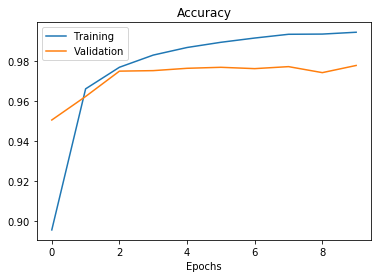

In [51]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [52]:
test_accuracy = model.evaluate(x_test, y_test_cat)[1]
test_accuracy

 8960/10000 [=========================>....] - ETA: 0s

0.97899999999999998